In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from env import get_db

In [25]:
url = get_db('telco_churn')
sql = """
SELECT * 
FROM customers
JOIN contract_types USING (contract_type_id)
JOIN payment_types USING (payment_type_id)
JOIN internet_service_types USING (internet_service_type_id);
"""

In [26]:
df = pd.read_sql(sql, url)

In [27]:
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
1,1,4,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,Credit card (automatic),DSL
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,Electronic check,DSL
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,Electronic check,DSL
4,1,3,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,Bank transfer (automatic),DSL


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
internet_service_type_id    7043 non-null int64
payment_type_id             7043 non-null int64
contract_type_id            7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

Zero nulls
Total charges is an object needs to be float
Impute empty string in total charges by doing monthly * tenure

In [29]:
df.total_charges = df.total_charges.replace(" ", df.tenure*df.monthly_charges)
df.total_charges.astype(float)

0        542.40
1        571.45
2        340.35
3         25.10
4         30.50
         ...   
7038     487.95
7039    1559.30
7040    1725.40
7041    1372.90
7042     856.50
Name: total_charges, Length: 7043, dtype: float64

In [30]:
train, test = train_test_split(df, random_state = 123, train_size=.8)
train, validate = train_test_split(train, random_state=123, train_size=.75)

In [31]:
train.shape, test.shape, validate.shape

((4225, 24), (1409, 24), (1409, 24))

In [40]:
train['is_churn'] = (train.churn == "Yes")

In [41]:
train.is_churn.mean()

0.2672189349112426

In [42]:
train.groupby(train.contract_type).mean()

,internet_service_type_id,payment_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,is_churn
contract_type,,,,,,,
Month-to-month,1.820436,1.934587,1.0,0.209919,17.410859,66.024348,0.426251
One year,1.869266,2.567661,2.0,0.136468,41.622706,64.971961,0.114679
Two year,1.985207,2.904339,3.0,0.089744,57.054241,61.460552,0.031558


In [48]:
def groupby_churn():
    for c in train.columns:
        print(train.groupby(train[c]).mean())

In [74]:
def groupby_churn(train):
    for c in train.columns:
        if len(train.groupby(train[c])) < 5:
            print(train.groupby(train[c]).is_churn.mean())
            print()

In [73]:
groupby_churn(train)

internet_service_type_id
1    0.191884
2    0.416935
3    0.079558
Name: is_churn, dtype: float64

payment_type_id
1    0.445964
2    0.203141
3    0.163128
4    0.150055
Name: is_churn, dtype: float64

contract_type_id
1    0.426251
2    0.114679
3    0.031558
Name: is_churn, dtype: float64

gender
Female    0.276676
Male      0.257712
Name: is_churn, dtype: float64

senior_citizen
0    0.239501
1    0.406562
Name: is_churn, dtype: float64

partner
No     0.330616
Yes    0.197819
Name: is_churn, dtype: float64

dependents
No     0.315877
Yes    0.148329
Name: is_churn, dtype: float64

phone_service
No     0.239024
Yes    0.270249
Name: is_churn, dtype: float64

multiple_lines
No                  0.255403
No phone service    0.239024
Yes                 0.287240
Name: is_churn, dtype: float64

online_security
No                     0.415174
No internet service    0.079558
Yes                    0.146912
Name: is_churn, dtype: float64

online_backup
No                     0.404278
No in

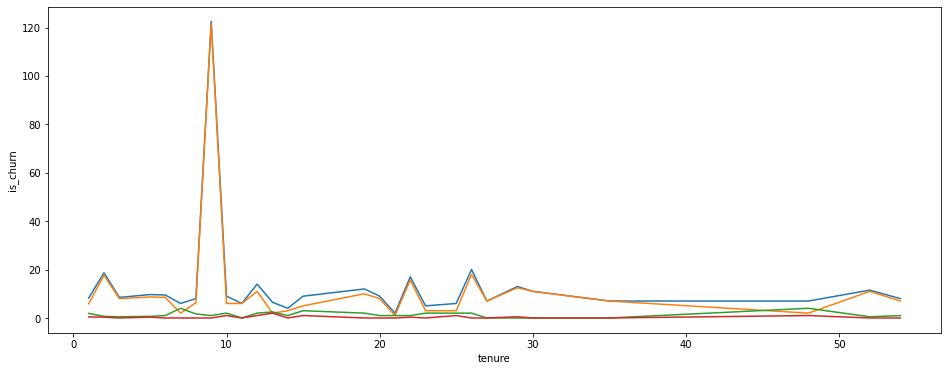

In [115]:
x = train.tenure
y = train.groupby(train.tenure).is_churn.sum()
y1 = train[train.contract_type == 'Month-to-month'].groupby(train.tenure).is_churn.sum()
y2 = train[train.contract_type == 'One year'].groupby(train.tenure).is_churn.sum()
y3 = train[train.contract_type == 'Two year'].groupby(train.tenure).is_churn.sum()

plt.figure(figsize=(16,6))
plt.legend
sns.lineplot(x, y, data=train, ci=None)
sns.lineplot(x, y1, data=train, ci=None)
sns.lineplot(x, y2, data=train, ci=None)
sns.lineplot(x, y3, data=train, ci=None)

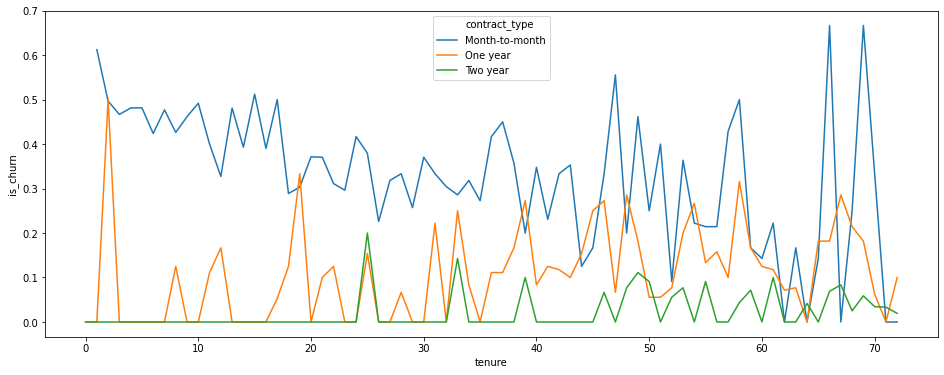

In [86]:
plt.figure(figsize=(16,6))
sns.lineplot('tenure', 'is_churn', hue='contract_type', data=train, ci=None)

In [103]:
train[train.tenure == 10].is_churn.sum()

30

In [106]:
train.tenure.value_counts()

1     380
72    218
2     151
3     125
4     113
     ... 
57     29
36     28
39     26
44     25
0      10
Name: tenure, Length: 73, dtype: int64

In [116]:
train.groupby("tenure").is_churn.value_counts().sort_values(ascending=False).head(20)


tenure  is_churn
1       True        229
72      False       213
1       False       151
71      False       102
2       False        76
        True         75
70      False        73
3       False        69
4       False        62
3       True         56
68      False        56
67      False        52
4       True         51
8       False        51
12      False        50
26      False        49
22      False        49
64      False        48
60      False        47
66      False        47
Name: is_churn, dtype: int64

In [108]:
train.is_churn.sum()

1129

In [114]:
train[train.tenure == 2].is_churn.sum()

75

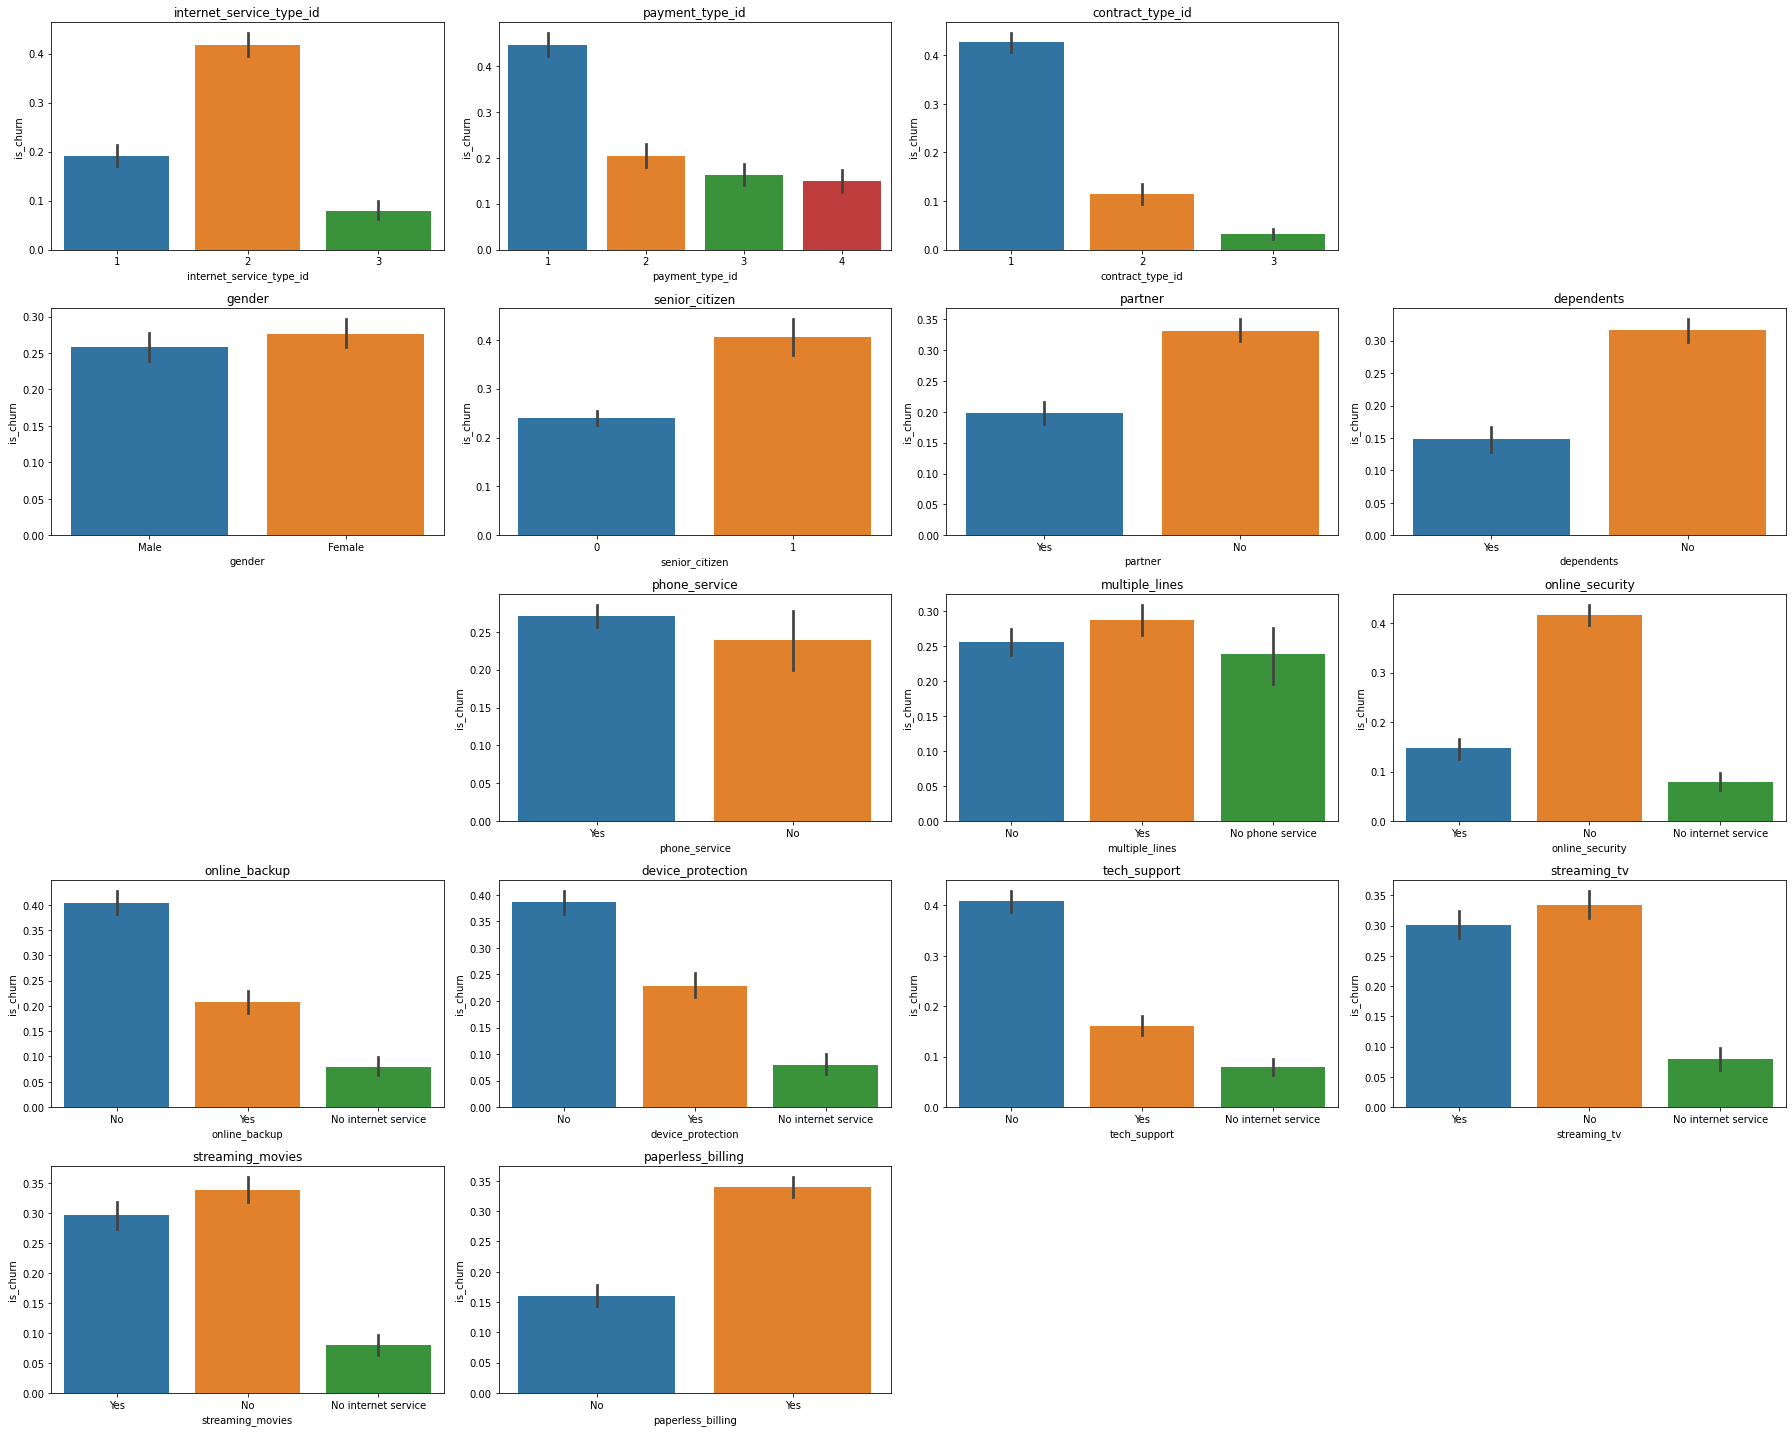

In [117]:
f = plt.figure(figsize=(25,20))
for i in range(0,20):
    if len(train.groupby(train.iloc[:,i])) < 5:
        f.add_subplot(5,4, i+1)
        sns.barplot(data=train, y="is_churn", x=train.iloc[:,i])
        plt.title(train.columns[i])
plt.tight_layout()
plt.show()

In [118]:
train.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,is_churn
440,1,4,1,3701-SFMUH,Male,0,Yes,Yes,7,Yes,...,Yes,Yes,No,69.70,516.15,No,Month-to-month,Credit card (automatic),DSL,False
67,1,1,1,0674-EYYZV,Female,0,No,No,1,Yes,...,Yes,No,Yes,54.65,54.65,No,Month-to-month,Electronic check,DSL,False
600,1,4,1,4918-QLLIW,Male,0,No,No,3,Yes,...,Yes,No,No,53.40,188.7,Yes,Month-to-month,Credit card (automatic),DSL,True
4883,2,4,2,6097-EQISJ,Female,0,Yes,Yes,66,Yes,...,Yes,Yes,Yes,102.45,6615.15,Yes,One year,Credit card (automatic),Fiber optic,True
1258,1,3,2,0654-PQKDW,Female,0,Yes,Yes,62,Yes,...,Yes,No,Yes,70.75,4263.45,No,One year,Bank transfer (automatic),DSL,False


In [144]:
def encode_all(train):
    """encodes all Yes values to 1, No values to 0, Female to 1 and Male to 0
    then turns encode columns into integers"""
#     train = train.copy()
    train = train.replace({"Yes": 1,
                          "No": 0,
                          "Female": 1,
                           "Male": 0                      
    })
    for c in train.columns:
        if train.dependents.value_counts().index == ['No', 'Yes']:
            train[c] = train[c].astype(int)
    return train

In [145]:
encode_all(train)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type,is_churn
440,1,4,1,3701-SFMUH,0,0,1,1,7,1,...,1,1,0,69.70,516.15,0,Month-to-month,Credit card (automatic),DSL,False
67,1,1,1,0674-EYYZV,1,0,0,0,1,1,...,1,0,1,54.65,54.65,0,Month-to-month,Electronic check,DSL,False
600,1,4,1,4918-QLLIW,0,0,0,0,3,1,...,1,0,0,53.40,188.7,1,Month-to-month,Credit card (automatic),DSL,True
4883,2,4,2,6097-EQISJ,1,0,1,1,66,1,...,1,1,1,102.45,6615.15,1,One year,Credit card (automatic),Fiber optic,True
1258,1,3,2,0654-PQKDW,1,0,1,1,62,1,...,1,0,1,70.75,4263.45,0,One year,Bank transfer (automatic),DSL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1,4,3,0017-DINOC,0,0,0,0,54,0,...,1,0,0,45.20,2460.55,0,Two year,Credit card (automatic),DSL,False
817,1,2,1,6629-CZTTH,0,0,0,0,1,1,...,0,1,1,55.70,55.7,1,Month-to-month,Mailed check,DSL,True
901,1,1,1,7377-DMMRI,0,0,0,0,2,1,...,0,0,1,47.80,92.45,1,Month-to-month,Electronic check,DSL,True
1987,1,3,3,3400-ESFUW,0,0,1,1,55,1,...,0,0,0,57.55,3046.4,1,Two year,Bank transfer (automatic),DSL,True


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 440 to 6958
Data columns (total 25 columns):
internet_service_type_id    4225 non-null int64
payment_type_id             4225 non-null int64
contract_type_id            4225 non-null int64
customer_id                 4225 non-null object
gender                      4225 non-null object
senior_citizen              4225 non-null int64
partner                     4225 non-null object
dependents                  4225 non-null object
tenure                      4225 non-null int64
phone_service               4225 non-null object
multiple_lines              4225 non-null object
online_security             4225 non-null object
online_backup               4225 non-null object
device_protection           4225 non-null object
tech_support                4225 non-null object
streaming_tv                4225 non-null object
streaming_movies            4225 non-null object
paperless_billing           4225 non-null object
monthly_charge

In [147]:
train.senior_citizen.astype(int)

440     0
67      0
600     0
4883    0
1258    0
       ..
1794    0
817     0
901     0
1987    0
6958    0
Name: senior_citizen, Length: 4225, dtype: int64